**<span style="color:#448844">Note</span>** This notebook is meant to be interactive. Launch this notebook in Jupyter to see its full potential.

Name: Aaron Palpallatoc

Section: S11

# Support Vector Machines Exercise
This exercise will guide you in implementing Support Vector Machines (SVM). At the end, you will also see the effect of hyperparameters on your model.

## Instructions
* Read each cell and implement the TODOs sequentially. The markdown/text cells also contain instructions which you need to follow to get the whole notebook working.
* Do not change the variable names unless the instructor allows you to.
* Answer all the markdown/text cells with "A: " on them. The answer must strictly consume one line only.
* You are expected to search how to some functions work on the Internet or via the docs. 
* There are commented markdown cells that have crumbs. Do not delete them or separate them from the cell originally directly below it.  
* You may add new cells for "scrap work" as long as the crumbs are not separated from the cell below it.
* The notebooks will undergo a "Restart and Run All" command, so make sure that your code is working properly.
* You are expected to understand the data set loading and processing separately from this class.
* You may not reproduce this notebook or share them to anyone.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (12.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

%load_ext autoreload
%autoreload 2

__This notebook will follow this format:__
* We will create toy datasets to try out SVM models with different kernel types
* We will see how we can regularize our SVM model
* We will train, validate, and test our SVM model with the breast cancer dataset.

# Creating an SVM model with different kernels

## Generating a linearly separable dataset
Let's create a linearly separable dataset before we get to more difficult datasets.

Shape of X_linear (100, 2)
Shape of y_linear (100,)


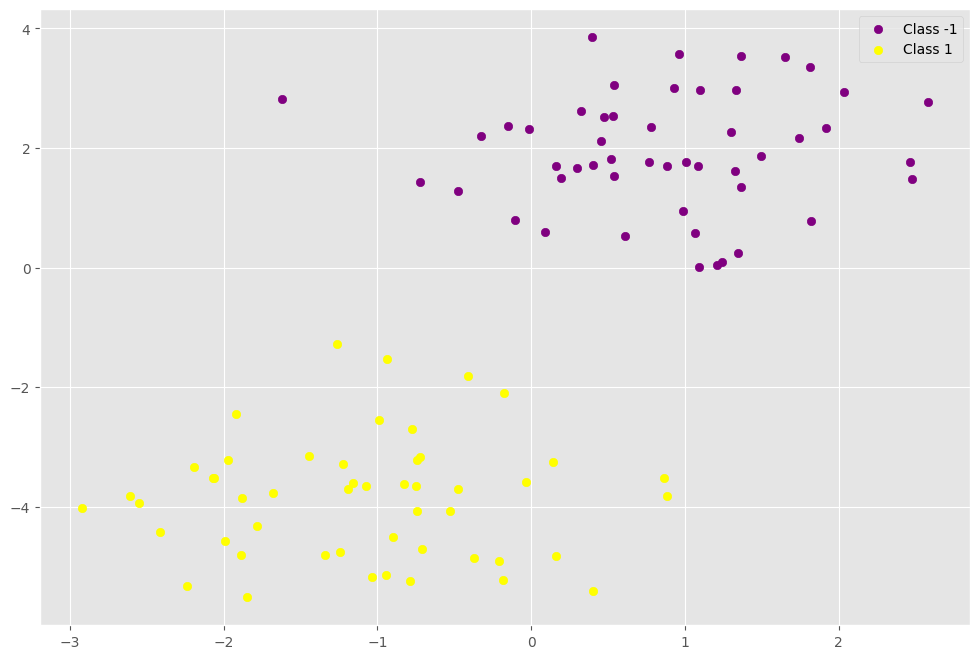

In [2]:
from sklearn.datasets import make_blobs
np.random.seed(42)

centers = [[1, 2], [-1, -4]]

X_linear, y_linear = make_blobs(n_samples=100, centers=centers)
y_linear[y_linear == 0] = -1

# plt.scatter(X_linear[:,0], X_linear[:,1],c=y_linear)
print("Shape of X_linear", X_linear.shape)
print("Shape of y_linear", y_linear.shape)

# Plot class -1
plt.scatter(X_linear[y_linear==-1, 0], X_linear[y_linear==-1, 1], c='purple', label='Class -1')

# Plot class 1
plt.scatter(X_linear[y_linear==1, 0], X_linear[y_linear==1, 1], c='yellow', label='Class 1')

plt.legend()

## Train an SVM model
We will use `sklearn`'s `SVC` model from the `svm` package. To start, create an SVM model with a __linear kernel.__

In [3]:
from sklearn import svm
# svm.SVC?

In [4]:
# write code here
svc_linear = svm.SVC(kernel='linear')

Train it with our `X_linear` and `y_linear`

In [5]:
# write code here
svc_linear.fit(X_linear, y_linear)

SVC(kernel='linear')

Get the predictions

In [6]:
# write code here
predictions = svc_linear.predict(X_linear)

predictions

array([ 1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1,  1,
       -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1])

We will be computing for the accuracy multiple times in this notebook, so let's create a function for this.

`compute_accuracy()` will compute for the accuracy given two vectors of equal length

__Inputs:__
- `predictions`: A numpy array of shape `(N,)` consisting of `N` samples representing the predicted values
- `actual`: A numpy array of shape `(N,)` consisting of `N` samples representing the actual (target) values

__Outputs:__
- `accuracy`: A scalar representing the percentage of elements where `predictions` and `actual` match out of the total number of elements

In [7]:
def compute_accuracy(predictions, actual):
    # write code here
    accuracy = np.sum(predictions == actual) / len(actual)
    return accuracy * 100

In [8]:
print("Linear SVC accuracy: ", compute_accuracy(predictions, y_linear),"%")

Linear SVC accuracy:  100.0 %


**Sanity Check:** This is a linearly separable data, so linear kernel should get a 100% accuracy here.

## Visualize our model
Let's try to visualize the decision boundary and the margin. To do this, we need to get the __weights__ and __bias/y-intercept__ of our model.

Get the weights of our model

In [9]:
# write code here
W = svc_linear.coef_[0]

W

array([-0.45941525, -0.73720067])

Get the bias from the model

In [10]:
# write code here
b = svc_linear.intercept_

b

array([-0.52426366])

The following code will plot our decision boundary (using `W` and `b`) and the fat margin

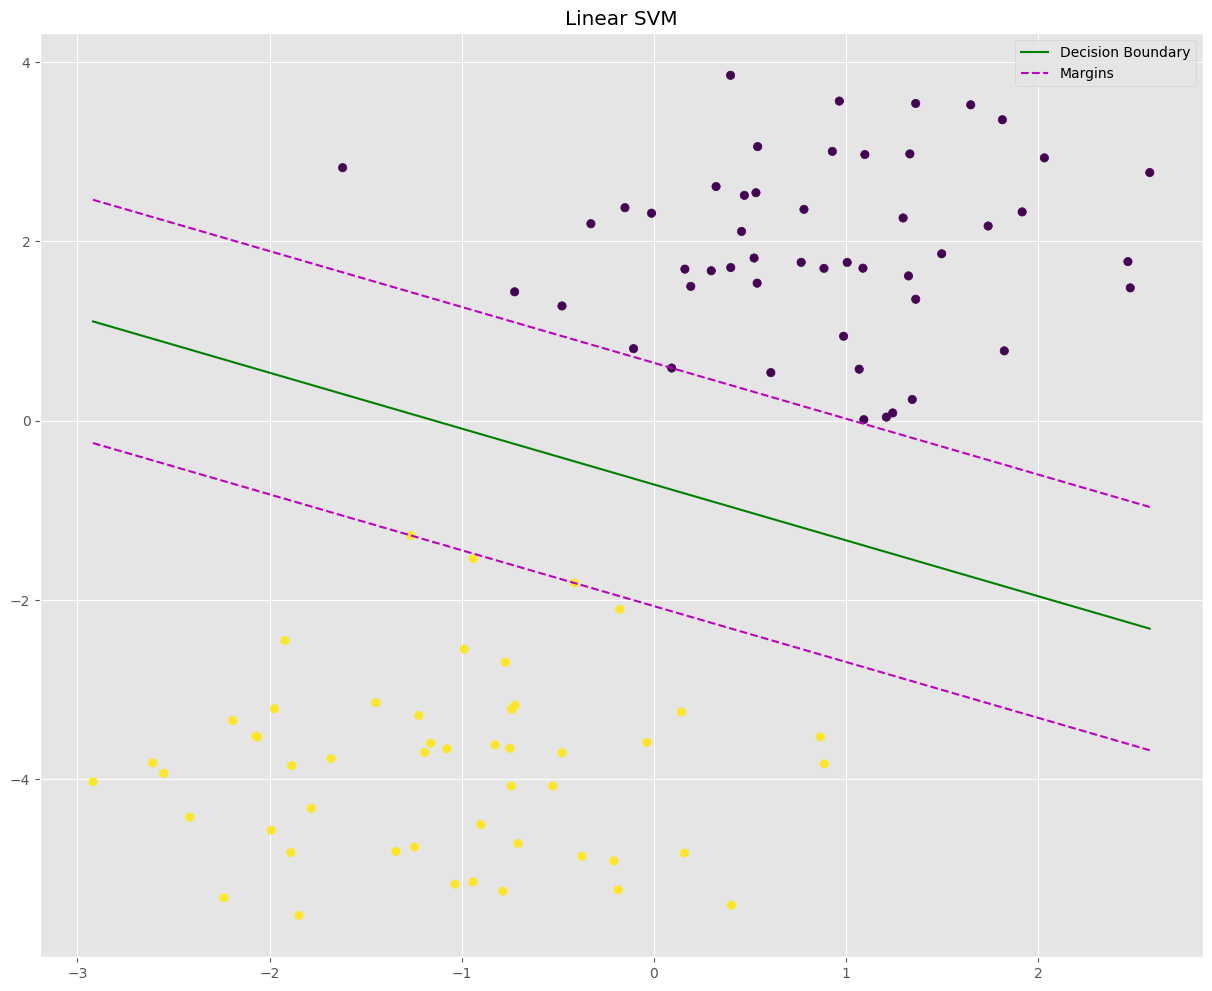

In [11]:
plt.figure(figsize=(15,12))

# plotting our data
plt.scatter(X_linear[:,0], X_linear[:,1],c=y_linear)

# plot decision boundary for 2D case
x_1 = np.min(X_linear[:,0])
y_1 = (-b - W[0]*x_1) / W[1]
x_2 = np.max(X_linear[:,0])
y_2 = (-b - W[0]*x_2) / W[1]

plt.plot([x_1, x_2], [y_1, y_2],'g',label="Decision Boundary")

# plot margins
x_1_a = np.min(X_linear[:,0])
y_1_a = (1 - b - W[0]*x_1) / W[1]
x_2_a = np.max(X_linear[:,0])
y_2_a = (1 - b - W[0]*x_2) / W[1]
plt.plot([x_1_a, x_2_a], [y_1_a, y_2_a],'--m')

x_1_b = np.min(X_linear[:,0])
y_1_b = (-1 - b - W[0]*x_1) / W[1]
x_2_b = np.max(X_linear[:,0])
y_2_b = (-1 - b - W[0]*x_2) / W[1]
plt.plot([x_1_b, x_2_b], [y_1_b, y_2_b],'--m', label="Margins")
plt.legend()

plt.title("Linear SVM")

plt.savefig("SVM linear with decision boundary.png")

**Sanity Check:** You should see the boundary (green line) clearly cutting the data with a large margin on either side.

## Support vectors
From the lecture, we learned that SVM retains the training instances which "define" the boundary and uses them to predict the new instance's class. Let's see those training instances which SVMs refer to as **support vectors**.

Get the number of support vectors in the model

In [12]:
# write code here
n_support = svc_linear.n_support_

n_support

array([1, 2])

**Sanity Check:** You should see an array of two numbers. The numbers will tell you the number of support vectors for both classes.

__Question #1:__ How many support vectors did the model need in total?

<!--crumb;qna;Question: How many support vectors did the model need in total?-->

A: 3

We can also get the features of the actual support vectors

In [13]:
# write code here
support_vectors = svc_linear.support_vectors_

support_vectors

array([[ 0.09197592,  0.5876963 ],
       [-0.41314291, -1.80954437],
       [-1.26465683, -1.27983083]])

In [14]:
for class_label, n_support in zip(svc_linear.classes_, svc_linear.n_support_):
    print(f"Class {class_label} has {n_support} support vectors")

Class -1 has 1 support vectors
Class 1 has 2 support vectors


**Sanity Check:** You should see the coordinates/feature values of the chosen support vectors. Verify their positions in the visualization above. They should be the nearest points to the margin.

For the questions below, feel free to modify the visualization code above to plot the support vectors.

__Question #2:__ How many support vectors does the class in `yellow` need?

<!--crumb;qna;Question: How many support vectors does the class in yellow need?-->

A: 2

__Question #3:__ How many support vectors does the class in `violet` need?

<!--crumb;qna;Question: How many support vectors does the class in violet need?-->

A: 1 

____

# Different kernels
We can extend SVM's to produce non-linear decision boundaries through kernels. This is similar to the feature transform that you did for the polynomial regression. The difference is that kernels gives you a way to get the same output without explicitly performing the feature transform (which may be expensive to compute specially for very high dimensional transforms). It can even represent an infinite dimensional transform such as the Gaussian / Radial Basis Function (RBF) kernel which _in theory_ can linearly separate any data. However, without proper tuning and regularization, we risk overfitting to the training data which makes your classifier useless since it cannot generalize to unseen data.

To apply kernels, we simply replace all instances of the inner product $\langle \cdot,\cdot \rangle$ with the kernel $K(\cdot,\cdot)$. 

Note that $$W = \sum_{i=1}^N \alpha_i y_i x_i$$

which implies that $$f(z) = W^Tz+b = \sum_{i=1}^N \alpha_i y_i \langle x_i, z\rangle +b$$ 

So you will need to modify the some of the functions to apply the kernel.

Some commonly used kernels:

- __Gaussian / Radial Basis Function (RBF) kernel__: $K(x,z) = \exp \bigl( -\frac{\Vert x-z \Vert^2}{2\sigma^2}\bigr)$
- __Polynomial kernel__: $K(x,z) = (x^Tz+c)^d$, where $d$ is the degree of the polynomial and $c$ is a hyperparameter set by the user

## Radial basis function kernel
### Generating a non-linearly separable dataset

Shape of X_circle (200, 2)
Shape of y_circle (200,)


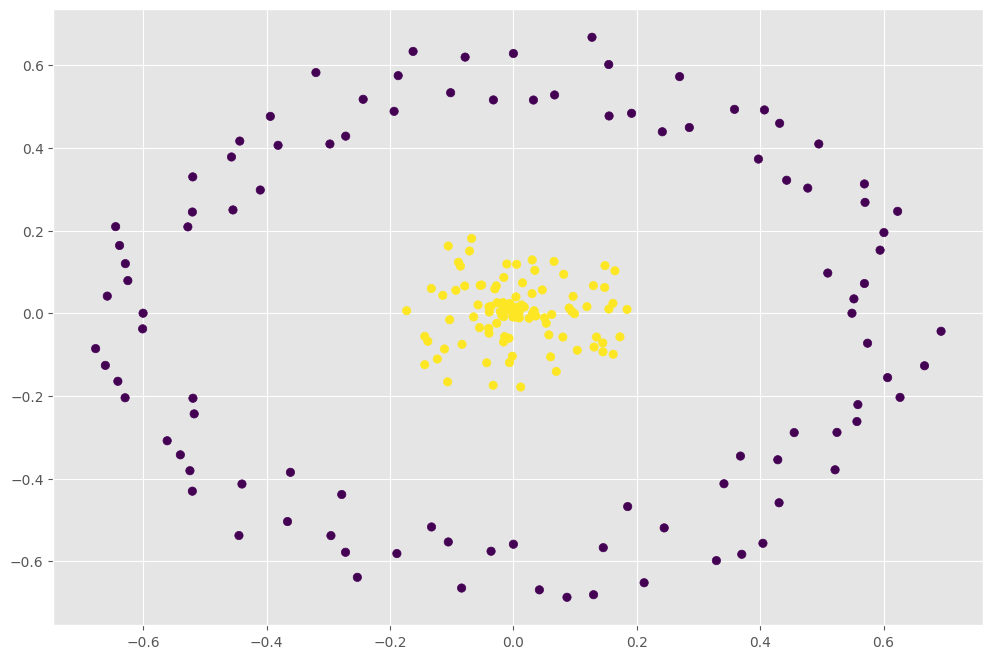

In [15]:
def generate_dummy_circle_data(num_points):
    np.random.seed(42)
    
    r = np.random.uniform(0,0.2,num_points)
    theta = np.random.uniform(0,2*np.pi,num_points)
    inner_circle = np.array([r*np.sin(theta), r*np.cos(theta)]).T
    
    r = np.random.uniform(0.5,0.7,num_points)
    theta = 2*np.pi*np.arange(num_points)/num_points
    outer_circle = np.array([r*np.sin(theta), r*np.cos(theta)]).T

    X = np.concatenate((inner_circle,outer_circle),axis=0)
    y = np.concatenate((np.ones(num_points), np.zeros(num_points)),axis=0)
    
    randIdx = np.arange(X.shape[0])
    np.random.shuffle(randIdx)
    
    X = X[randIdx]
    y = y[randIdx].astype(int)
    
    return X, y

X_circle,y_circle = generate_dummy_circle_data(100)

print("Shape of X_circle", X_circle.shape)
print("Shape of y_circle", y_circle.shape)

plt.scatter(X_circle[:,0],X_circle[:,1],c=y_circle)

### Train model
This data can be easily separated using an `rbf` kernel. Create an `rbf`-kernel SVM, and keep the other parameters to their default values for now. Train it on the circle dataset (`X_circle` and `y_circle`).

In [16]:
# write code here
svc_rbf = svm.SVC(kernel='rbf')
svc_rbf.fit(X_circle, y_circle)

SVC()

Get the model predictions on `X_circle`

In [17]:
# write code here
predictions = svc_rbf.predict(X_circle)

predictions

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0])

Then get the accuracy

In [18]:
print("RBF SVC accuracy: ", compute_accuracy(predictions, y_circle),"%")

RBF SVC accuracy:  100.0 %


**Sanity check:** Using `rbf` here will give you a perfect accuracy.

Get the number of support vectors per class

In [19]:
# write code here
n_support = svc_rbf.n_support_

# get total number of support vectors
total_sv = np.sum(n_support)

total_sv

15

In [20]:
# get count of support_vectors_
svc_rbf.support_vectors_.shape

(15, 2)

__Question #4:__ How many support vectors does the model need?

<!--crumb;qna;Question: How many support vectors does the model need?-->

A: 15

### Visualize our model

The code below will visualize the SVM's (with an `rbf` kernel) decision boundary.

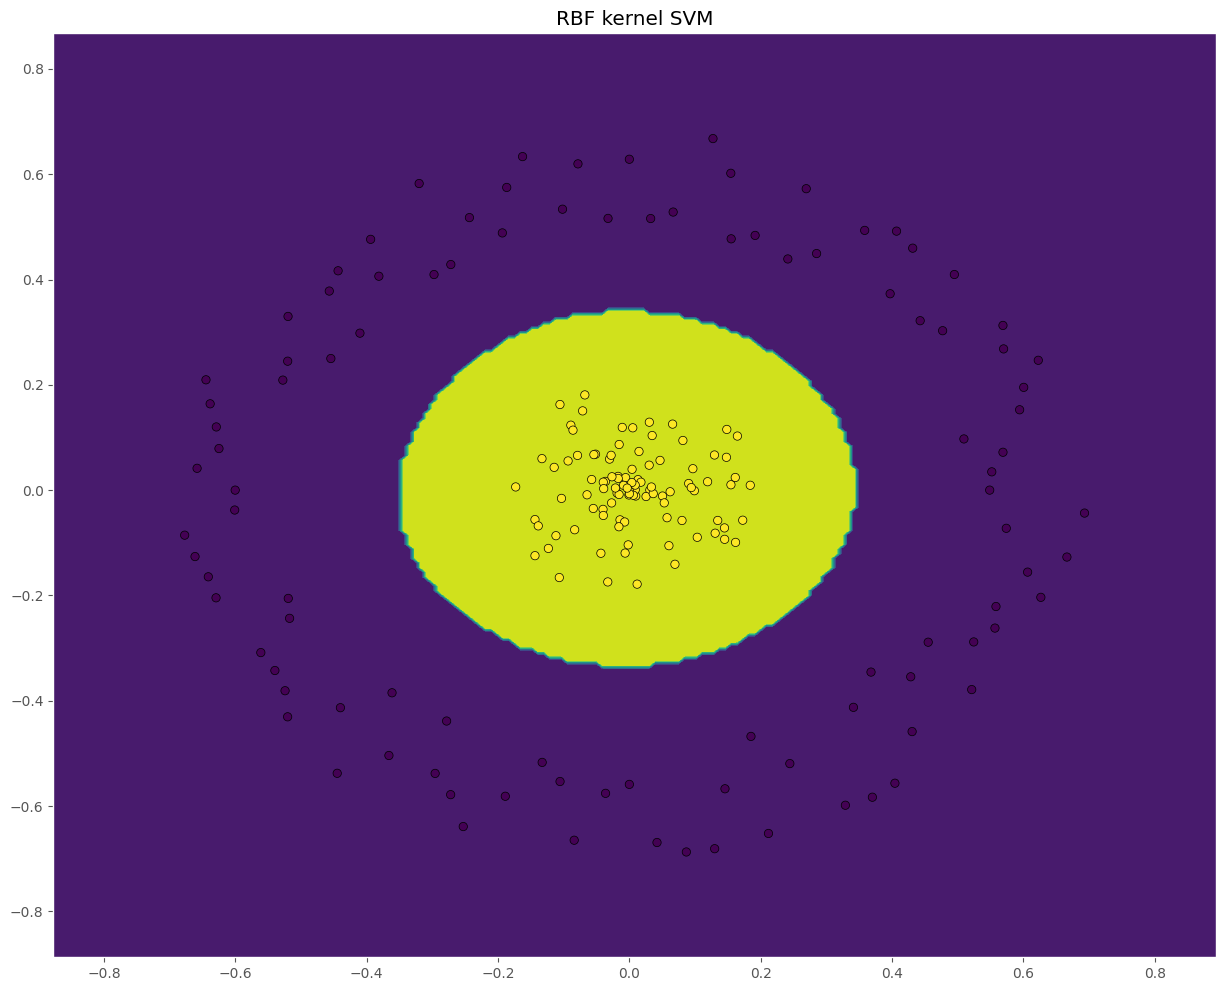

In [21]:
plt.figure(figsize=(15,12))

# visualize the decision boundary
x_min, x_max = X_circle[:, 0].min() - 0.2, X_circle[:, 0].max() + 0.2
y_min, y_max = X_circle[:, 1].min() - 0.2, X_circle[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

x_test = np.squeeze(np.stack((xx.ravel(),yy.ravel()))).T

Z = svc_rbf.predict(x_test)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z)
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=y_circle, edgecolors='black')
plt.xlim([x_min,x_max])
plt.ylim([y_min,y_max])

plt.title("RBF kernel SVM")
plt.savefig("SVM rbf kernel")

**Sanity Check:** You should see the data cropped in the middle, separating the classes from each other.

## Polynomial kernel

### Generating a polynomial dataset
The following cell just creates a dataset that we know is non-linearly separable.

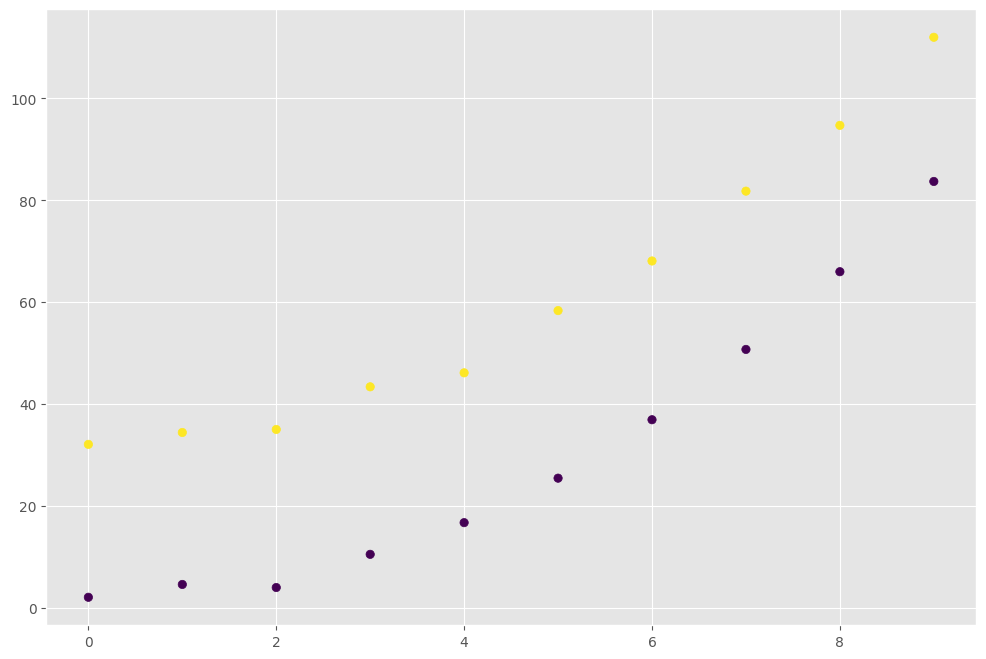

In [22]:
np.random.seed(1)

y1 = [val**2 + np.random.random()*5 for val in np.arange(0,10,1)]
y2 = [val**2 + np.random.random()*5 + 30 for val in np.arange(0,10,1)]

X_poly = np.zeros((2*10,2))
X_poly[:,0] = np.append(np.arange(0,10,1),np.arange(0,10,1))
X_poly[:,1] = np.append(y1,y2)

y_poly = np.zeros((2*10,))
y_poly[0:10] = -1
y_poly[10:20] = 1

plt.scatter(X_poly[:,0],X_poly[:,1],c=y_poly)

### Using a polynomial kernel
The visualization above is a clear indicator that the data cannot be (properly) separated by a line.

Create an SVM model with a `poly` kernel. Set the polynomial degree to `3` for now, $\gamma$ to 2. Train it with our polynomial data.

In [23]:
# svm.SVC?

In [24]:
# write code here
svc_poly = svm.SVC(kernel='poly', degree=3, gamma=2)
svc_poly.fit(X_poly, y_poly)

SVC(gamma=2, kernel='poly')

Get the predictions

In [25]:
# write code here
predictions = svc_poly.predict(X_poly)

predictions

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

Let's compute for the accuracy

In [26]:
print("Polynomial SVC accuracy: ", compute_accuracy(predictions, y_poly),"%")

Polynomial SVC accuracy:  100.0 %


### Visualize our model

The code below will visualize the polynomial SVM's decision boundary.

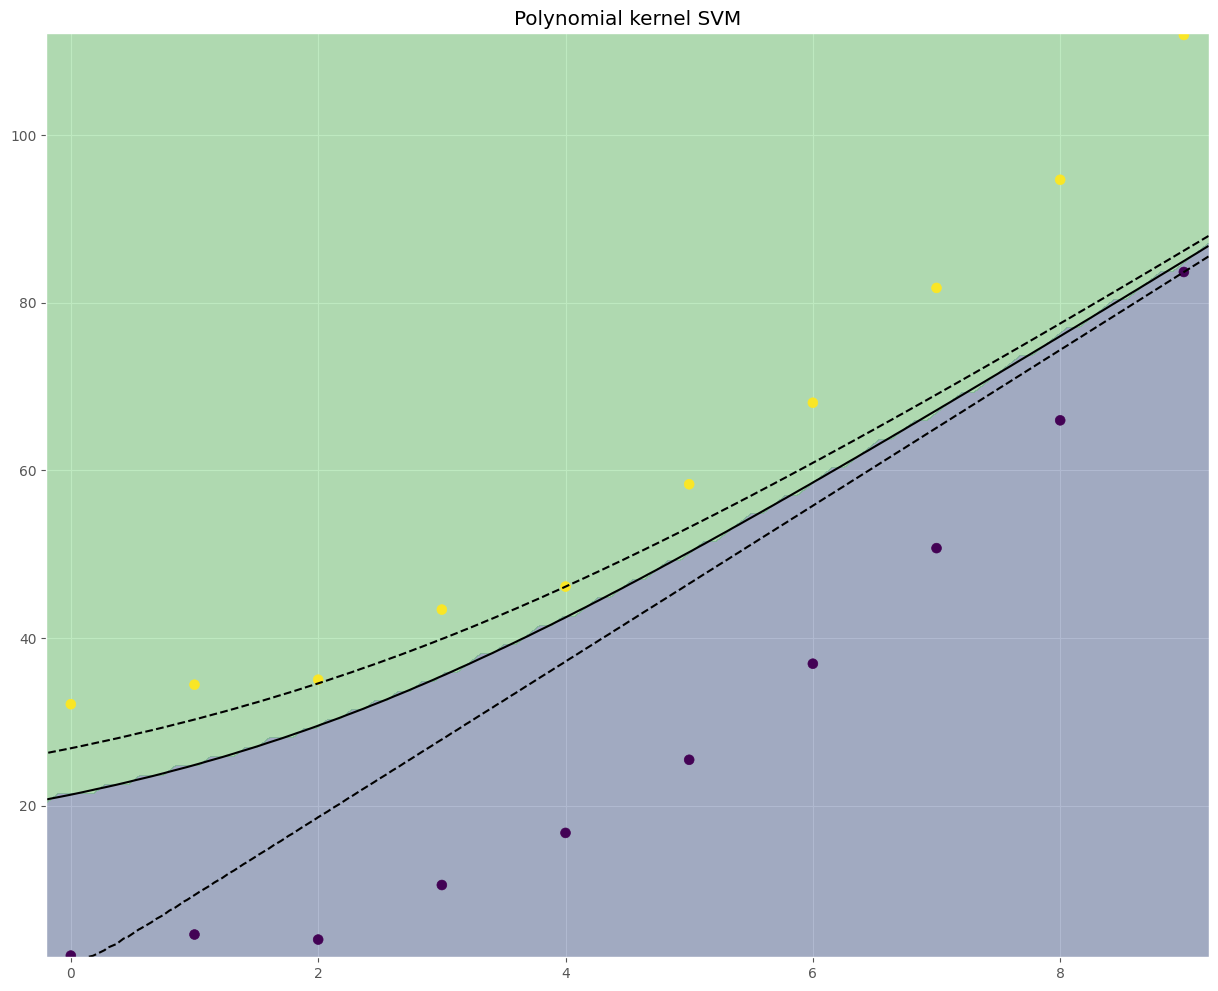

In [27]:
plt.figure(figsize=(15,12))

x_min, x_max = X_poly[:, 0].min() - 0.2, X_poly[:, 0].max() + 0.2
y_min, y_max = X_poly[:, 1].min() - 0.2, X_poly[:, 1].max() + 0.2

idxPlus=y_poly[y_poly<0]
idxMin=y_poly[y_poly>0]
plt.scatter(X_poly[:,0],X_poly[:,1],c=y_poly)


X2,Y2 = np.mgrid[x_min:x_max:100j,y_min:y_max:100j]
Z = svc_poly.decision_function(np.c_[X2.ravel(),Y2.ravel()])
Z = Z.reshape(X2.shape)
plt.contourf(X2,Y2,Z > 0,alpha=0.4)

plt.contour(X2,Y2,Z,colors=['k','k','k'], linestyles=['--','-','--'],levels=[-1,0,1])
plt.scatter(svc_poly.support_vectors_[:,0],svc_poly.support_vectors_[:,1],s=120,facecolors='none')
plt.scatter(X_poly[:,0],X_poly[:,1],c=y_poly,s=50,alpha=0.95);

plt.title("Polynomial kernel SVM")
plt.savefig("SVM polynomial kernel")

___

# Regularizing our SVM models

## Tuning the hyperparameter `degree`
We have two regularizers called $\gamma$ and $C$. But before we get to that, let's try to fit our polynomial `SVC` to our circle dataset with varying values for `degree`.

The degrees will be as follows:

In [28]:
degree_vals = [1, 3, 5, 10, 15, 20]

degree_vals

[1, 3, 5, 10, 15, 20]

### Visualizing the decision boundary as gamma increases

In the code below, initialize an `SVC` with an `poly` kernel. Set the hyperparameter `degree` to match the `degree` for that iteration.

Then fit it to our data `X_circle` and `y_circle`

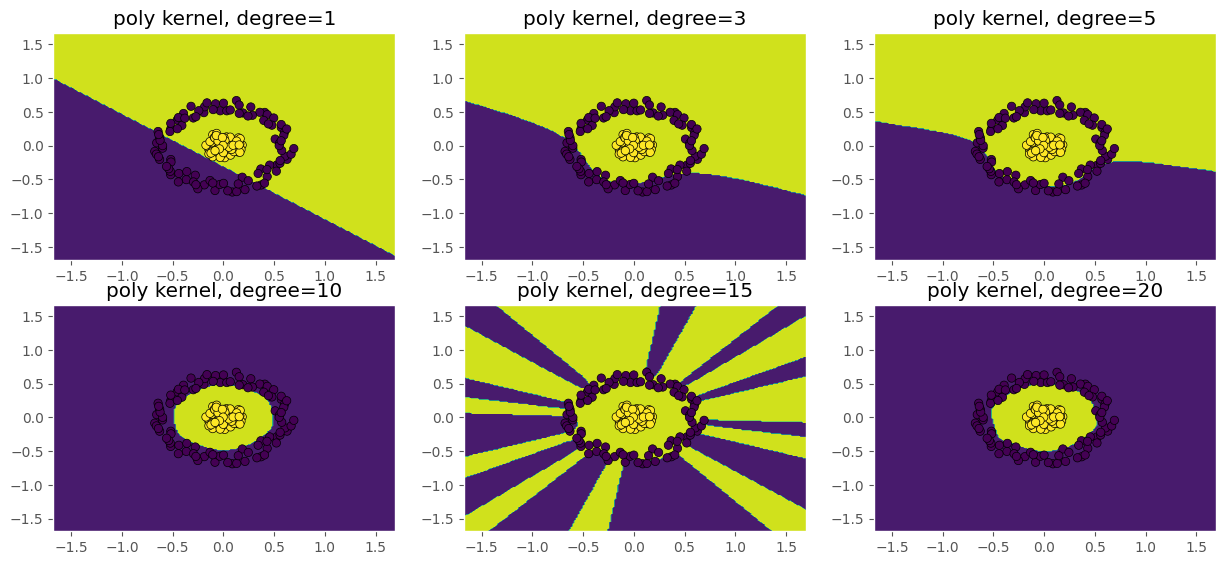

In [29]:
x_min, x_max = X_circle[:, 0].min() - 1, X_circle[:, 0].max() + 1
y_min, y_max = X_circle[:, 1].min() - 1, X_circle[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# We will let our classifier predict this set of values
x_test = np.squeeze(np.stack((xx.ravel(),yy.ravel()))).T

plt.figure(figsize=(15,10))
plt_ctr = 1

for degree in degree_vals:

    # write code here
    clf = svm.SVC(kernel='poly', degree=degree)
    clf.fit(X_circle, y_circle)
    
    
    Z = clf.predict(x_test)
    Z = Z.reshape(xx.shape)
    
    plt.subplot(3,3,plt_ctr)
    plt.contourf(xx, yy, Z)
    plt.scatter(X_circle[:, 0], X_circle[:, 1], c=y_circle, edgecolors='black')
    
    plt.xlim([x_min,x_max])
    plt.ylim([y_min,y_max])
    
    plt.title("poly kernel, degree=" + str(degree))
    
    plt_ctr += 1

__Question #5:__ Was the `SVC` with a `poly` kernel able to separate the classes of the circle dataset?

<!--crumb;qna;Question: Was the SVC with a poly kernel able to separate the classes of the circle dataset?-->

A: Yes 

## Preparing our datasets for experiments on $\gamma$ and $C$ 

Before we proceed to tuning our $\gamma$ and $C$ values, let's create a dataset for these experiments 

__Mixed dataset.__ This dataset will have a large overlap between the two classes.

Shape of X_mixed (30, 2)
Shape of y_mixed (30,)


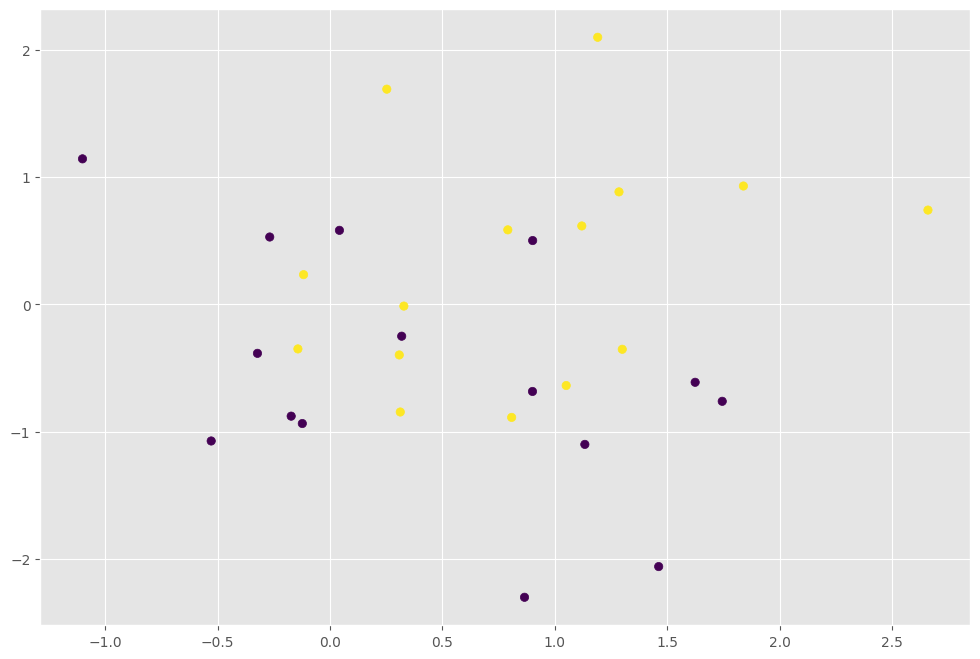

In [30]:
np.random.seed(1)
centers = [[0, 0], [1, 0]]
X_mixed, y_mixed = make_blobs(n_samples=30, centers=centers)
y_mixed[y_mixed == 0] = -1
plt.scatter(X_mixed[:,0], X_mixed[:,1],c=y_mixed)

print("Shape of X_mixed",X_mixed.shape)
print("Shape of y_mixed", y_mixed.shape)

This dataset is intentionally made to have a large overlap so we can see how our model will change its boundary when we tune our hyperparameters

__Outlier dataset.__ This dataset is the same as the linear dataset (`X_linear`, `y_linear`) but will also contain two outliers

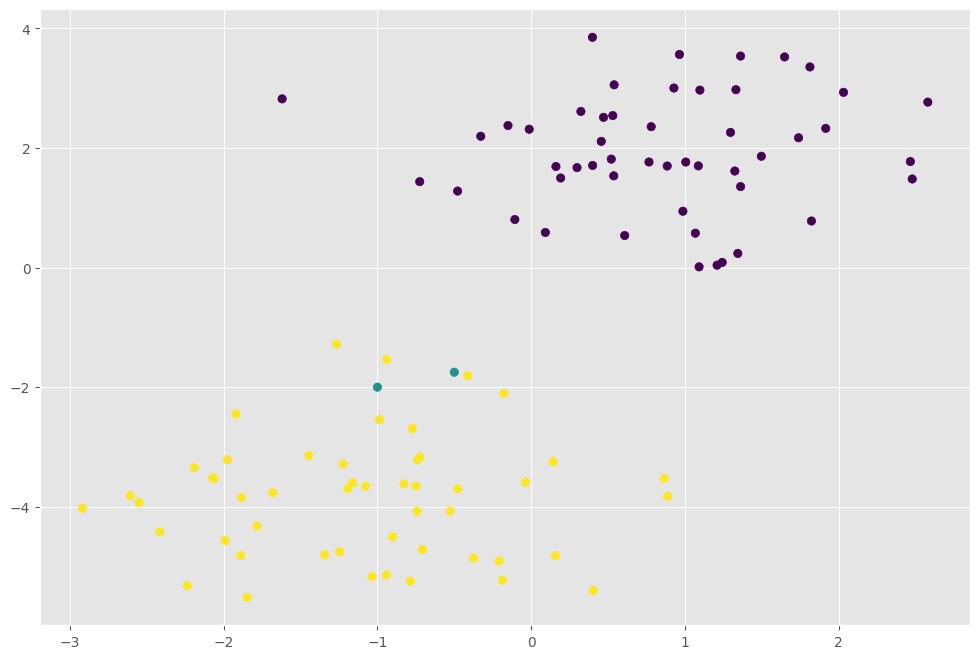

In [31]:
X_outlier = np.concatenate((X_linear, [[-1,-2],[-0.5, -1.75]]), axis=0)
y_outlier = np.concatenate((y_linear, [0, 0]))

plt.scatter(X_outlier[:,0], X_outlier[:,1], c=y_outlier)

## Tuning Hyperparameter $\gamma$ (gamma)

From the docs:

> The behavior of the model is very sensitive to the gamma parameter. If gamma is too large, the radius of the area of influence of the support vectors only includes the support vector itself and no amount of regularization with C will be able to prevent overfitting.

> When gamma is very small, the model is too constrained and cannot capture the complexity or “shape” of the data. The region of influence of any selected support vector would include the whole training set. The resulting model will behave similarly to a linear model with a set of hyperplanes that separate the centers of high density of any pair of two classes.

For the following section we will try out the following $\sigma$ values. The $\gamma$ = $1/\sigma$

In [32]:
sigma_vals = np.arange(0.0001, 0.9, 0.1)
sigma_vals

array([1.000e-04, 1.001e-01, 2.001e-01, 3.001e-01, 4.001e-01, 5.001e-01,
       6.001e-01, 7.001e-01, 8.001e-01])

### Visualizing the decision boundary as $\gamma$ increases

`visualize_gamma_boundary()` will visualize the decision boundary of an `SVC` with varying degrees of $\sigma$

__Inputs:__
- `kernel`: could either be `poly`, or `rbf`
- `sigma_vals`: A numpy array of shape `(S,)` consisting of `S` numbers representing the $\sigma$ values we want to try out
- `X`: A numpy array of shape `(N, 2)` consisting of `N` samples and `2` dimensions representing the data features `X`
- `y`: A numpy array of shape `(N,)` consisting of `N` samples representing the class of each sample


The code has been filled up except for the part where the `SVC` is initialized and trained on `X` and `y`. __Your tasks are:__
- Initialize an `SVC` with the `kernel`. Do not forget to set `gamma` hyperparameter to the inverse of that iteration's `sigma` value. 
- Fit the model to the input data `X` and `y`

In [33]:
def visualize_gamma_boundary(kernel, sigma_vals, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # We will let our classifier predict this set of values
    x_test = np.squeeze(np.stack((xx.ravel(),yy.ravel()))).T

    plt.figure(figsize=(15,10))
    plt_ctr = 1

    for sigma in sigma_vals:

        # write code here
        clf = svm.SVC(kernel=kernel, gamma=(1/sigma))
        clf.fit(X, y)
        

        Z = clf.predict(x_test)
        Z = Z.reshape(xx.shape)

        plt.subplot(3,3,plt_ctr)
        plt.contourf(xx, yy, Z)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black')

        plt.xlim([x_min,x_max])
        plt.ylim([y_min,y_max])

        plt.title(kernel + " kernel, gamma = " + "{:.2f}".format(1/sigma))

        plt_ctr += 1

__Mixed dataset__ Let's try to run an SVM with an `rbf` kernel on the mixed dataset.

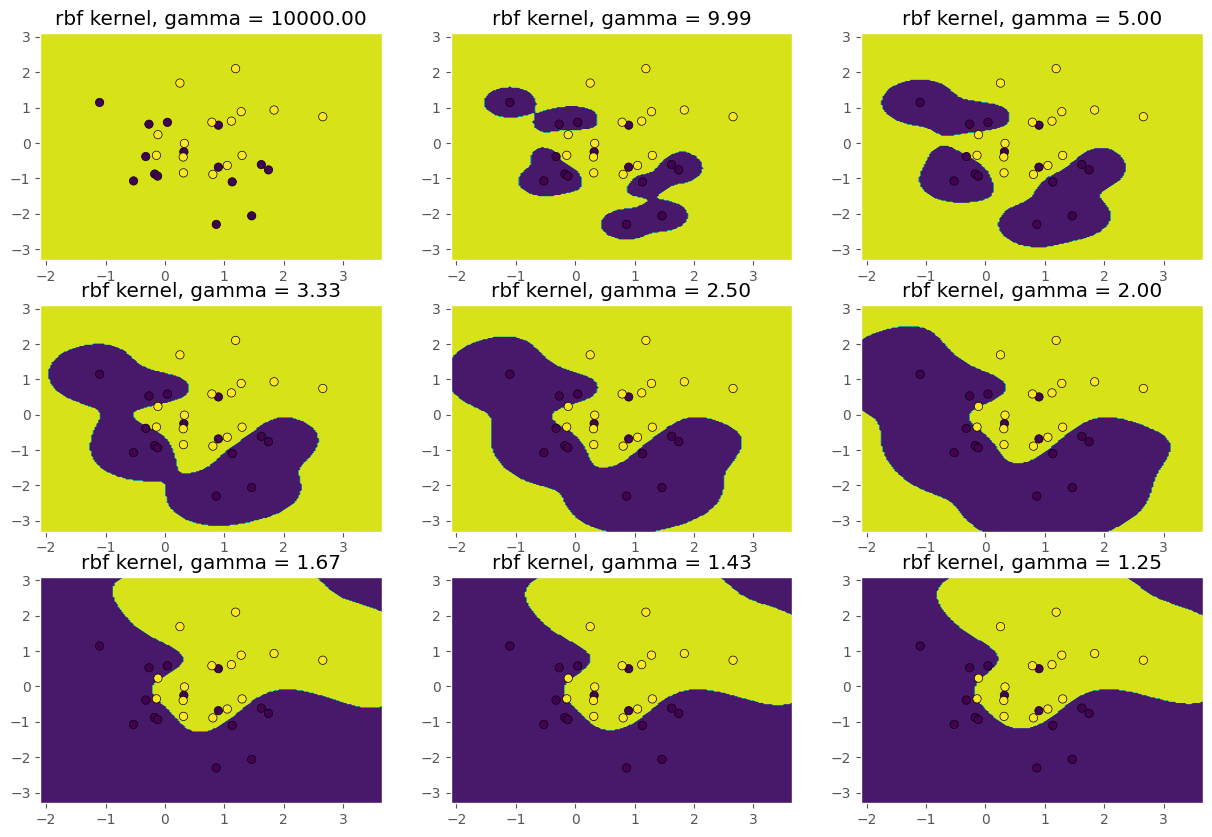

In [34]:
visualize_gamma_boundary("rbf", sigma_vals, X_mixed, y_mixed)

**Sanity Check:** $\gamma = 1/\sigma$

As $\gamma$ increases, the standard deviation decreases. What you should see are blobs with small sizes (small standard deviation/$\sigma$) when $\gamma$ is large. As $\gamma$ decreases (and $\sigma$ increases), then the blobs look like they are clustering together.

__Outlier dataset__ We can also check out how $\gamma$ will handle the outlier dataset with a `poly` kernel.

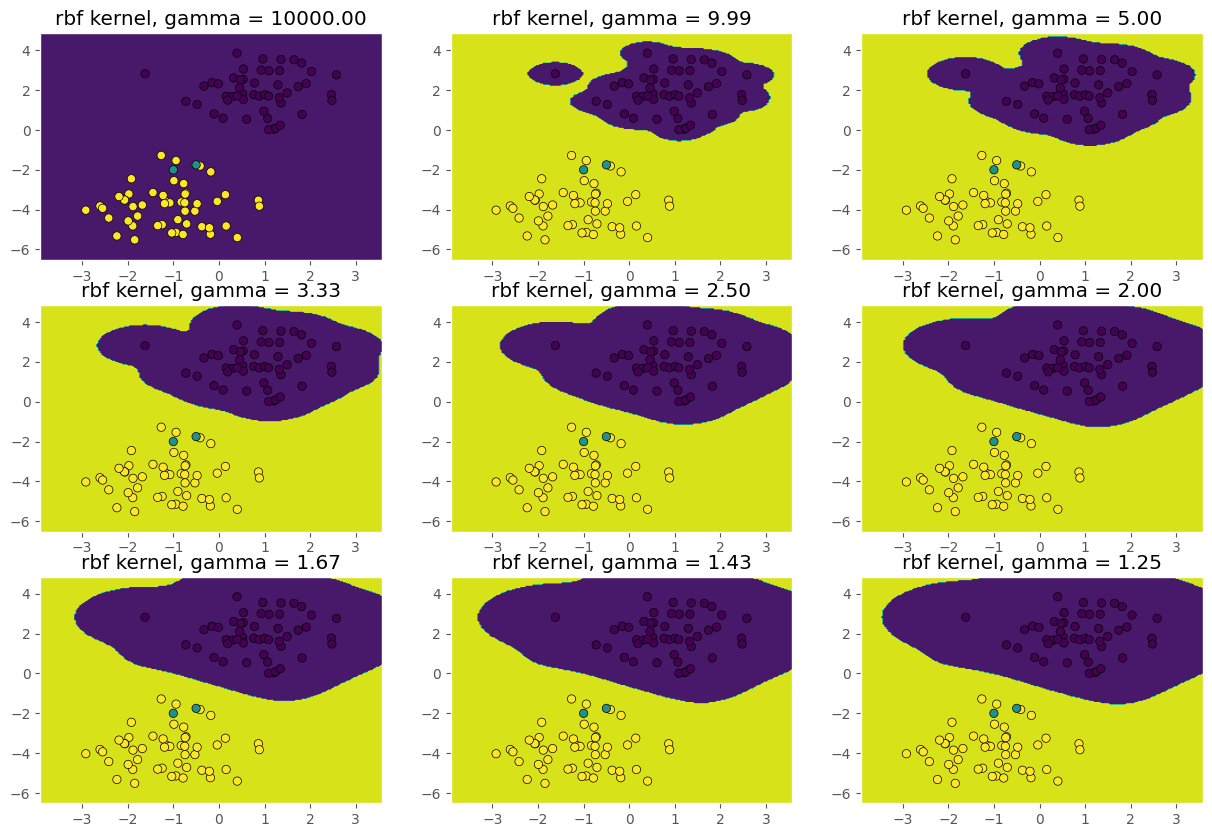

In [35]:
visualize_gamma_boundary("rbf", sigma_vals, X_outlier, y_outlier)

__Question #6:__ What range of `gamma` values better fit our outlier data? Smaller or bigger `gamma` values?

<!--crumb;qna;Question: What range of gamma values better fit our outlier data? Smaller or bigger gamma values?-->

A: Smaller `gamma` values

## Tuning Hyperparameter `C`


Recall: The dual optimization problem for support vector machines that we want to solve.<br />

$$
\begin{array}{lll}
    \max_\alpha & \quad \sum_{i=1}^N \alpha_i - \frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N y_i y_j \alpha_i \alpha_j \langle x_i, x_j \rangle \\
    \text{such that} & \quad 0 \leq \alpha_i \leq C, \forall_i \\
    \quad & \quad \sum_{i=1}^N \alpha_i y_i = 0
\end{array}
$$
Here, we see that all $\alpha$'s must not only be more than or equal to 0, we bound it to $0 \leq \alpha_i \leq C$

from sklearn's documentation:

>The `C` parameter trades off misclassification of training examples against simplicity of the decision surface. A low `C` makes the decision surface smooth, while a high `C` aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.

Here, you can think of `C` as the inverse of our previous regularization parameter $\lambda$, so $C = 1/\lambda$


$$
\begin{align}
 \alpha_i = 0 & \implies y_i (W^Tx_i + b) \geq 1 \\
 \alpha_i = C & \implies y_i (W^Tx_i + b) \leq 1 \\
 0 < \alpha_i < C & \implies y_i (W^Tx_i + b) = 1
\end{align}
$$

For the following section we will try out the following `C` values

In [36]:
C_vals = [0.0001, 0.001, 0.01 , 0.1, 1.0, 1.5, 2.0, 30, 50, 1000, 2000, 5000]

### Visualizing the decision boundary as gamma increases

`visualize_gamma_boundary()` will visualize the decision boundary of an `SVC` with varying degrees of $C$

__Inputs:__
- `kernel`: could either be `poly`, or `rbf`
- `C_vals`: A numpy array of shape `(S,)` consisting of `S` numbers representing the `C` values we want to try out
- `X`: A numpy array of shape `(N, 2)` consisting of `N` samples and `2` dimensions representing the data features `X`
- `y`: A numpy array of shape `(N,)` consisting of `N` samples representing the class of each sample


The code has been filled up except for the part where the `SVC` is initialized and trained on `X` and `y`. __Your tasks are:__
- Initialize an `SVC` with the `kernel`. Do not forget to set the `C` hyperparameter to that iteration's `C` value. 
- Then fit it to the input data `X` and `y`.


In [37]:
def visualize_C_boundary(kernel, C_vals, X, y):
    # visualize the decision boundary as C varies
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    # This will be our test set
    x_test = np.squeeze(np.stack((xx.ravel(),yy.ravel()))).T

    plt.figure(figsize=(15,10))
    plt_ctr = 1

    for C in C_vals:

        # write code here
        clf = svm.SVC(kernel=kernel, C=C)
        clf.fit(X, y)
        

        Z = clf.predict(x_test)
        Z = Z.reshape(xx.shape)

        plt.subplot(4,3,plt_ctr)
        plt.contourf(xx, yy, Z)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black')

        plt.xlim([x_min,x_max])
        plt.ylim([y_min,y_max])

        plt.title(kernel + " kernel, C = " + str(C))

        plt_ctr += 1

__Mixed dataset__ Let's try to run an SVM with an `rbf` kernel on the mixed dataset.

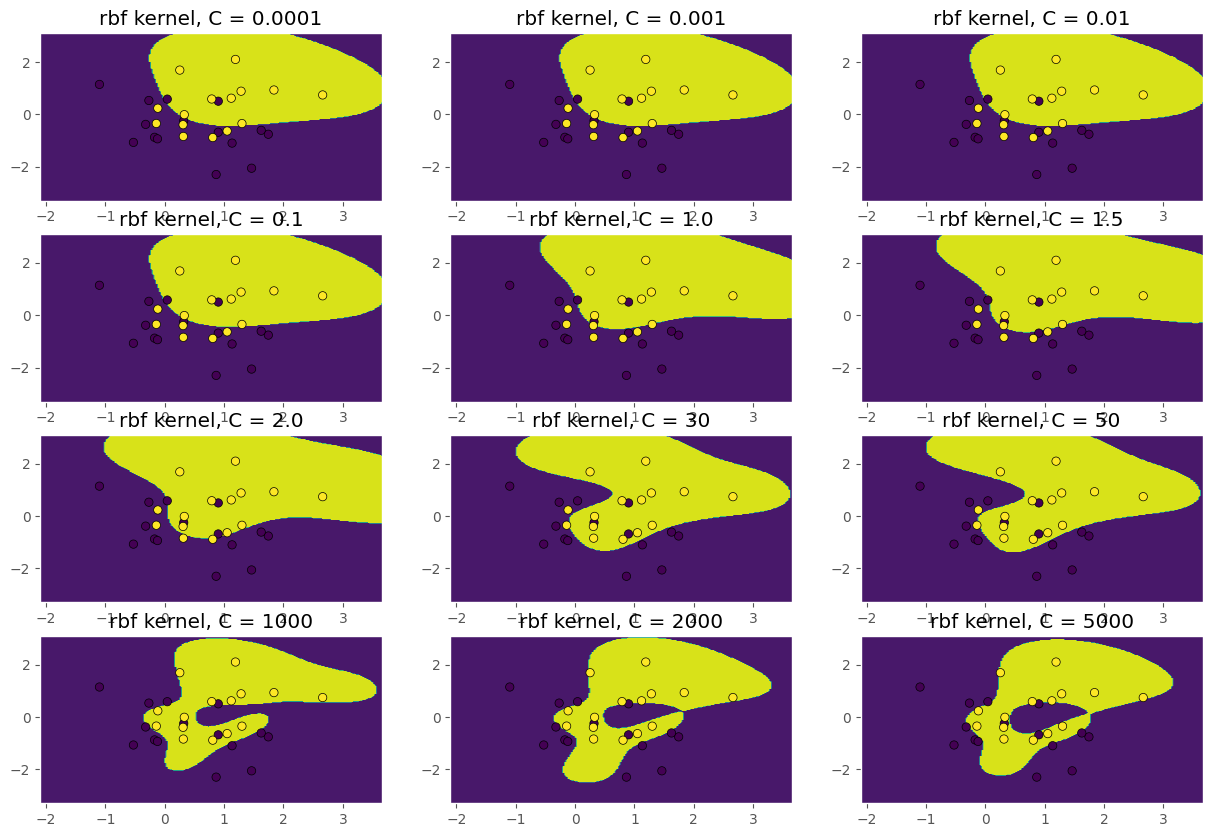

In [38]:
visualize_C_boundary("rbf", C_vals, X_mixed, y_mixed)

**Sanity Check:**

You should see a more complex model as you increase C. In the case of SVMswith an `rbf` kernel, you should see more blobs created to section off the the classes (yellows from the violets).

__Outlier dataset__ Let's try to run an SVM with a `poly` kernel on the outlier dataset.

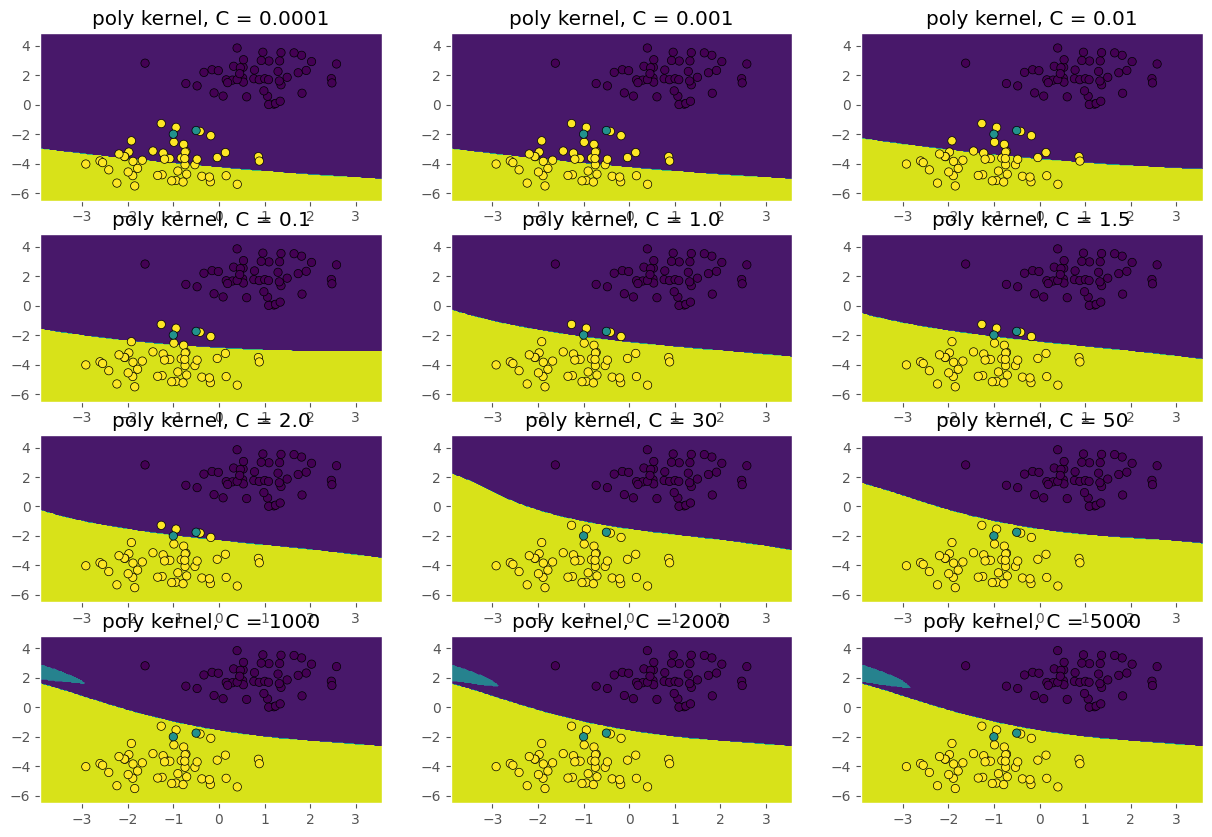

In [39]:
visualize_C_boundary("poly", C_vals, X_outlier, y_outlier)

____

# Hyperparameter tuning our models 

For this section, we will use the __Wisconsin breast cancer dataset__. It has `569 instances` and `30 features`. The features are characteristics measured from images of cell nuclei of aspirated breast masses:

* radius (mean)
* texture (mean)
* perimeter (mean)
* area (mean)
* smoothness (mean)
* compactness (mean)
* concavity (mean)
* concave points (mean)
* symmetry (mean)
* fractal dimension (mean)
* radius (standard error)
* texture (standard error)
* perimeter (standard error)
* area (standard error)
* smoothness (standard error)
* compactness (standard error)
* concavity (standard error)
* concave points (standard error)
* symmetry (standard error)
* fractal dimension (standard error)
* radius (worst)
* texture (worst)
* perimeter (worst)
* area (worst)
* smoothness (worst)
* compactness (worst)
* concavity (worst)
* concave points (worst)
* symmetry (worst)
* fractal dimension (worst)

Our goal is to determine whether the cell nuclei of the aspirated breast mass is __malignant__ or __benign__.

There are `212` malignant, and `357` benign samples. We will be stratifying our dataset when we split our test data to make sure we get the proper representation for our training, validation, and test sets.

You can learn more about the dataset here: https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset

In [40]:
from sklearn import datasets

In [41]:
data_breast_cancer = datasets.load_breast_cancer()
data_breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

The features `X` is stored in `data_breast_cancer.data`, and the labels `y` is stored in `data_breast_cancer.target`. 

Accessing `data_breast_cancer.target_names` will return the mapping of the labels, while `data_breast_cancer.feature_names` will return the names of the features.

In [42]:
data_breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [43]:
data_breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## Preparing our dataset
Load our `X` and `y` before splitting our train and test sets

In [44]:
# write code here
X_cancer = data_breast_cancer.data

X_cancer.shape

(569, 30)

In [45]:
# write code here
y_cancer = data_breast_cancer.target

y_cancer.shape

(569,)

Split out train and test sets. The test set should be `20%` of the original data, and we have to make sure that the data is stratified. Set the random state to `42` as well.

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
# write code here
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, test_size=0.2, stratify=y_cancer, random_state=42) 

print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ", X_test.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (455, 30)
y_train shape :  (455,)
X_test shape :  (114, 30)
y_test shape :  (114,)


Before we proceed, let's have a quick look at our data

In [48]:
import pandas as pd

temp_df = pd.DataFrame(X_train, columns=data_breast_cancer.feature_names)
temp_df 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,...,11.25,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399
1,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.125900,0.1724,0.06053,...,22.03,25.07,146.00,1479.0,0.1665,0.29420,0.53080,0.21730,0.3032,0.08075
2,10.66,15.15,67.49,349.6,0.08792,0.04302,0.00000,0.000000,0.1928,0.05975,...,11.54,19.20,73.20,408.3,0.1076,0.06791,0.00000,0.00000,0.2710,0.06164
3,13.56,13.90,88.59,561.3,0.10510,0.11920,0.07860,0.044510,0.1962,0.06303,...,14.98,17.13,101.10,686.6,0.1376,0.26980,0.25770,0.09090,0.3065,0.08177
4,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.021730,0.2013,0.05955,...,12.36,26.14,79.29,459.3,0.1118,0.09708,0.07529,0.06203,0.3267,0.06994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.032630,0.1727,0.06317,...,17.80,28.03,113.80,973.1,0.1301,0.32990,0.36300,0.12260,0.3175,0.09772
451,19.53,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.106200,0.1792,0.06552,...,25.93,26.24,171.10,2053.0,0.1495,0.41160,0.61210,0.19800,0.2968,0.09929
452,15.46,23.95,103.80,731.3,0.11830,0.18700,0.20300,0.085200,0.1807,0.07083,...,17.11,36.33,117.70,909.4,0.1732,0.49670,0.59110,0.21630,0.3013,0.10670
453,17.05,19.08,113.40,895.0,0.11410,0.15720,0.19100,0.109000,0.2131,0.06325,...,19.59,24.89,133.50,1189.0,0.1703,0.39340,0.50180,0.25430,0.3109,0.09061


In [49]:
temp_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.067213,19.247363,91.557407,648.541099,0.096167,0.103869,0.089193,0.048344,0.180618,0.062820,...,16.177226,25.647297,106.625297,869.026593,0.132329,0.254329,0.276578,0.113904,0.290865,0.083945
std,3.499380,4.405291,24.149231,344.944564,0.013458,0.053522,0.081747,0.038925,0.028074,0.007159,...,4.770020,6.225470,33.195053,552.926912,0.022550,0.159882,0.215937,0.066784,0.064624,0.018408
min,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.635000,16.000000,74.720000,415.650000,0.086475,0.063750,0.028010,0.020220,0.161750,0.057685,...,13.010000,21.090000,83.715000,513.900000,0.115950,0.145850,0.107900,0.063390,0.249400,0.071835
50%,13.270000,18.820000,85.980000,541.800000,0.095660,0.090970,0.059990,0.032630,0.178100,0.061440,...,14.910000,25.400000,97.590000,683.400000,0.131400,0.211600,0.229800,0.097220,0.281900,0.079930
75%,15.740000,21.710000,103.700000,770.050000,0.104850,0.130100,0.132200,0.073820,0.195300,0.066250,...,18.550000,29.370000,124.950000,1033.500000,0.146200,0.336800,0.385300,0.162500,0.320100,0.092070
max,28.110000,39.280000,188.500000,2499.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,33.130000,49.540000,229.300000,3432.000000,0.218400,1.058000,1.252000,0.291000,0.663800,0.207500


From the results above, we can see that the features are scaled differently. We don't want the model to think that one feature is important simply because of the scale of the features, so we will standardize our data before we start modelling.

## Scaling our features
We will first scale our features before modelling. We will use `StandardScaler` to standardize our features. 

Standardizing will make sure that each of our features will each have a $\mu=0$ and a $\sigma^2=1$.

In [50]:
from sklearn.preprocessing import StandardScaler

Create a `StandardScaler` object

In [51]:
# write code here
scaler = StandardScaler()

Get the `scaler` to fit our train data. Then, assign the scaled data to our our newly scaled data.

In [52]:
# write code here

X_train_scaled = scaler.fit_transform(X_train)

X_train_scaled

array([[-1.07200079, -0.6584246 , -1.0880801 , ..., -1.35052668,
        -0.35265805, -0.54138003],
       [ 1.74874285,  0.06650173,  1.75115682, ...,  1.54991557,
         0.19107787, -0.1737386 ],
       [-0.97473376, -0.93112416, -0.99770871, ..., -1.70744192,
        -0.307734  , -1.21303263],
       ...,
       [ 0.39844772,  1.06867262,  0.50751384, ...,  1.53492543,
         0.16164487,  1.23754763],
       [ 0.85331409, -0.0380331 ,  0.9054796 , ...,  2.10455077,
         0.31035897,  0.36249578],
       [-0.91179628, -0.82431683, -0.87666079, ..., -0.51332734,
        -0.50756857,  1.30824791]])

__Note:__ We should only scale our training data and not our test data.

__Question #7:__ Why should we not scale our data before splitting our data into train and test sets?

<!--crumb;qna;Question: Why should we not scale our data before splitting our data into train and test sets?-->

A: This is to avoid data leakage, wherein the test set is used to scale the training data. The test set is supposed to represent unseen data, and using it to inform any part of the training process (including scaling) can bias the model evaluation process.

You could call `scaler.mean_` and `scaler.var_` to get the $\mu$ and $\sigma^2$ that was used by our `scaler`.

In [53]:
scaler.mean_

array([1.40672132e+01, 1.92473626e+01, 9.15574066e+01, 6.48541099e+02,
       9.61674286e-02, 1.03868901e-01, 8.91933224e-02, 4.83439516e-02,
       1.80618022e-01, 6.28197802e-02, 3.98971868e-01, 1.21872923e+00,
       2.82255011e+00, 3.92437473e+01, 7.08365714e-03, 2.55379802e-02,
       3.25524826e-02, 1.16727824e-02, 2.07788308e-02, 3.79728374e-03,
       1.61772264e+01, 2.56472967e+01, 1.06625297e+02, 8.69026593e+02,
       1.32328923e-01, 2.54328571e-01, 2.76578191e-01, 1.13904332e-01,
       2.90865275e-01, 8.39446154e-02])

In [54]:
scaler.var_

array([1.22187448e+01, 1.93639350e+01, 5.81903628e+02, 1.18725243e+05,
       1.80712022e-04, 2.85827257e-03, 6.66787604e-03, 1.51179086e-03,
       7.86440379e-04, 5.11446215e-05, 7.15726338e-02, 3.25920404e-01,
       3.88604219e+00, 1.74033127e+03, 9.80883859e-06, 3.40270730e-04,
       1.04553051e-03, 3.94736119e-05, 7.66368997e-05, 7.71209605e-06,
       2.27030793e+01, 3.86712966e+01, 1.09948974e+03, 3.05056239e+05,
       5.07394371e-04, 2.55060624e-02, 4.65261197e-02, 4.45029298e-03,
       4.16714095e-03, 3.38099487e-04])

Great! Now we can proceed to modelling

## Randomized search of hyperparameters
For this section we will use `RandomizedSearchCV` to tune our hyperparameters. 

In [55]:
from sklearn.model_selection import RandomizedSearchCV

We will also create our base model. Set the model's `max_iter` to `10`.

In [56]:
# write code here
svc = svm.SVC(max_iter=10)

Let's define the hyperparameters.

__Hyperparameters__:
- C could be 0.0001, 0.001, 0.01 , 0.1, 1.0, 5, 30, 50
- kernel could be linear, poly, rbf
- degree could be 1, 3, 5, 10, 25, 50
- gamama could be scale, auto, 1000, 10, 5, 2.5, 1.5, 1.0

In [57]:
# write code here
hyperparameters = {
    'C': [0.0001, 0.001, 0.01 , 0.1, 1.0, 5, 30, 50],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [1, 3, 5, 10, 25, 50],
    'gamma': ['scale', 'auto', 1000, 10, 5, 2.5, 1.5, 1.0]
}

Initialize your `RandomizedSearchCV` with these additional parameters:
- `30` random models
- `5`-fold cross-validation
- also set the random state to `42` so we'll get the same results

Then fit it to training data

In [58]:
# write code here
rssvc = RandomizedSearchCV(svc, hyperparameters, random_state=42, n_iter=30, cv=5)


Get the best parameters found by `RandomizedSearchCV`

In [59]:
# write code here
best_model = rssvc.fit(X_train_scaled, y_train)

# get best parameters
best_model.best_params_

c:\Users\tutor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\tutor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\tutor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\tutor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\tut

{'kernel': 'linear', 'gamma': 1000, 'degree': 3, 'C': 0.001}

__Question #8:__ What are the best parameters?

<!--crumb;qna;Question: What are the best parameters?-->

A: {'kernel': 'linear', 'gamma': 1000, 'degree': 3, 'C': 0.001}

You could also get the results of each randomized model using `rssvc.cv_results_`

In [65]:
pd.DataFrame(rssvc.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_gamma,param_degree,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001905,0.000913,0.000801,0.000400,linear,1000,3,0.001,"{'kernel': 'linear', 'gamma': 1000, 'degree': ...",0.923077,0.934066,0.912088,0.956044,0.956044,0.936264,0.017582,1
1,0.001201,0.000399,0.000599,0.000489,poly,10,3,5,"{'kernel': 'poly', 'gamma': 10, 'degree': 3, '...",0.747253,0.736264,0.725275,0.692308,0.846154,0.749451,0.051730,19
2,0.001401,0.000489,0.001003,0.000004,rbf,1000,1,1.0,"{'kernel': 'rbf', 'gamma': 1000, 'degree': 1, ...",0.626374,0.626374,0.626374,0.626374,0.626374,0.626374,0.000000,25
3,0.001801,0.000751,0.001398,0.000488,linear,scale,25,0.001,"{'kernel': 'linear', 'gamma': 'scale', 'degree...",0.923077,0.934066,0.912088,0.956044,0.956044,0.936264,0.017582,1
4,0.001403,0.000487,0.000000,0.000000,poly,1.5,50,1.0,"{'kernel': 'poly', 'gamma': 1.5, 'degree': 50,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
5,0.001600,0.000488,0.001200,0.000405,rbf,scale,10,0.001,"{'kernel': 'rbf', 'gamma': 'scale', 'degree': ...",0.923077,0.956044,0.923077,0.956044,0.890110,0.929670,0.024670,5
6,0.001600,0.000489,0.001000,0.000001,rbf,auto,5,1.0,"{'kernel': 'rbf', 'gamma': 'auto', 'degree': 5...",0.934066,0.956044,0.923077,0.890110,0.901099,0.920879,0.023466,10
7,0.001505,0.000640,0.000998,0.000003,rbf,scale,50,0.1,"{'kernel': 'rbf', 'gamma': 'scale', 'degree': ...",0.923077,0.956044,0.923077,0.956044,0.890110,0.929670,0.024670,5
8,0.001403,0.000489,0.000600,0.000490,linear,2.5,5,0.01,"{'kernel': 'linear', 'gamma': 2.5, 'degree': 5...",0.978022,0.879121,0.934066,0.934066,0.934066,0.931868,0.031391,4
9,0.001199,0.000400,0.000801,0.000401,poly,2.5,3,0.01,"{'kernel': 'poly', 'gamma': 2.5, 'degree': 3, ...",0.747253,0.736264,0.725275,0.692308,0.846154,0.749451,0.051730,19


Get the training performance

In [61]:
# write code here
predictions_train = best_model.predict(X_train_scaled)

predictions_train

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,

Compute for the training accuracy

In [62]:
# write code here
predictions_train = best_model.predict(X_train_scaled)

acc = compute_accuracy(predictions_train, y_train)
print("Best model train accuracy:",acc,"%")

Best model train accuracy: 95.82417582417582 %


## Testing phase

Now that we have our best model, let's see how it performs on our test dataset. Before we start predicting, make sure we scale our test data set. Use the `scaler` to do this.

In [63]:
# write code here
X_test_scaled = scaler.transform(X_test)

X_test_scaled

array([[ 1.56851278,  2.16401585,  1.74286587, ...,  1.20214432,
        -0.14043064,  0.90036171],
       [-0.84027641, -0.5970672 , -0.8741735 , ..., -1.10124064,
        -0.81429139, -0.71323608],
       [-0.07072262,  1.19138742,  0.03202768, ...,  0.57255843,
         1.14997397,  1.86841162],
       ...,
       [ 0.3583966 , -0.44935493,  0.48264098, ...,  1.63386036,
         0.54117564,  1.91191948],
       [-0.41401799,  1.07321761, -0.42314565, ...,  0.06139464,
        -0.1280378 ,  0.64747227],
       [-0.6829327 , -0.69932953, -0.66607058, ..., -0.23615965,
        -0.16211811, -0.20147486]])

Now, let's get the test predictions and test results!

In [64]:
# write code here
predictions_test = best_model.predict(X_test_scaled)

acc = compute_accuracy(predictions_test, y_test)
print("Best model test accuracy:",acc,"%")

Best model test accuracy: 95.6140350877193 %


__Question #9:__ What is the test accuracy of the best model found?

<!--crumb;qna;Question: What is the test accuracy of the best model found?-->

A: 95.6140350877193 %

**Question #10**: Congratulations for making it this far. In your own words (no need to be formal), summarize the biggest learnings, insights, and takeaways that you have for STINTSY. *(You get a point as long as you answer this question)*

A: I learned a lot of supervised models such as kNN, linear & logistic regression, neural network, naive bayes, decision trees, ensemble, and support vector machines. I also got to know the general model pipeline which I can apply to our thesis. My biggest learning is that, when choosing a model, its more of a trial-and-error. While there are guidelines and best practices, there's often no definitive "right" or "wrong" model to choose. It's more of trying out multiple models and selecting the one that performs best on a validation set.

While some concepts are still harder for me to grasp (maybe because I am lacking some foundations or I am too slow 😭), I really appreciate sir for teaching us to the best of his ability. I wished I have consulted a lot and I believe it would be a fun experience learning STINTSY if I fully understand everything. Thank you sir!

# Summary

* Support vector machines come in different kernels: linear, polynomial, and rbf. There are other kernels that you can also try out or you can also make your own.
* The kernels make feature transformation quickly because of the way SVM structured its optimization
* While we didn't cover it, support vector machines can also handle regression tasks
* SVMs have two regularizers: $\gamma$ which control the standard deviation of our rbf kernels, and `C` which controls the penalization of a sample being placed in the wrong boundary.


## <center>fin</center>


<!-- DO NOT MODIFY OR DELETE THIS -->

<sup>made/compiled by daniel stanley tan & courtney anne ngo 🐰 & thomas james tiam-lee</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> danieltan07@gmail.com & courtneyngo@gmail.com & thomasjamestiamlee@gmail.com</sup><br>
<sup>please cc your instructor, too</sup>
<!-- DO NOT MODIFY OR DELETE THIS -->